In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

symbol = '^SOX'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-23 00:00:00-05:00,2906.949951,2971.050049,2905.770020,2945.270020,0,0.0,0.0
2023-01-30 00:00:00-05:00,2903.600098,3168.699951,2859.179932,3082.110107,0,0.0,0.0
2023-02-06 00:00:00-05:00,3027.500000,3140.810059,2979.739990,3011.149902,0,0.0,0.0
2023-02-13 00:00:00-05:00,3022.780029,3134.489990,2980.139893,3005.870117,0,0.0,0.0
2023-02-20 00:00:00-05:00,2961.120117,3002.969971,2875.560059,2935.110107,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,5013.750000,5207.370117,5013.750000,5122.970215,0,0.0,0.0
2024-12-30 00:00:00-05:00,5032.450195,5173.390137,4962.419922,5163.649902,0,0.0,0.0
2025-01-06 00:00:00-05:00,5284.509766,5381.040039,5001.270020,5037.470215,0,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-27 00:00:00-05:00,1863.180054,1899.479980,1782.189941,1789.930054,0,0.0,0.0
2020-02-03 00:00:00-05:00,1794.709961,1913.959961,1794.300049,1864.359985,0,0.0,0.0
2020-02-10 00:00:00-05:00,1849.989990,1983.709961,1849.989990,1956.560059,0,0.0,0.0
2020-02-17 00:00:00-05:00,1920.180054,1982.089966,1883.920044,1891.050049,0,0.0,0.0
2020-02-24 00:00:00-05:00,1793.069946,1827.859985,1605.939941,1705.540039,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,5013.750000,5207.370117,5013.750000,5122.970215,0,0.0,0.0
2024-12-30 00:00:00-05:00,5032.450195,5173.390137,4962.419922,5163.649902,0,0.0,0.0
2025-01-06 00:00:00-05:00,5284.509766,5381.040039,5001.270020,5037.470215,0,0.0,0.0


In [3]:
period = 26
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-01-27 00:00:00-05:00,1863.180054,1899.479980,1782.189941,1789.930054,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-03 00:00:00-05:00,1794.709961,1913.959961,1794.300049,1864.359985,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-10 00:00:00-05:00,1849.989990,1983.709961,1849.989990,1956.560059,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-17 00:00:00-05:00,1920.180054,1982.089966,1883.920044,1891.050049,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-24 00:00:00-05:00,1793.069946,1827.859985,1605.939941,1705.540039,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,5013.750000,5207.370117,5013.750000,5122.970215,0,0.0,0.0,5154.299805,4968.805176,5225.794922,4583.320557,5611.279541
2024-12-30 00:00:00-05:00,5032.450195,5173.390137,4962.419922,5163.649902,0,0.0,0.0,5136.375000,4968.805176,5216.130005,4597.817932,5587.117249
2025-01-06 00:00:00-05:00,5284.509766,5381.040039,5001.270020,5037.470215,0,0.0,0.0,5136.375000,4968.805176,5211.777588,4604.346558,5576.236206


/home/bitwalk/MyProjects/stock/venv/lib64/python3.13/site-packages/mplfinance/plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


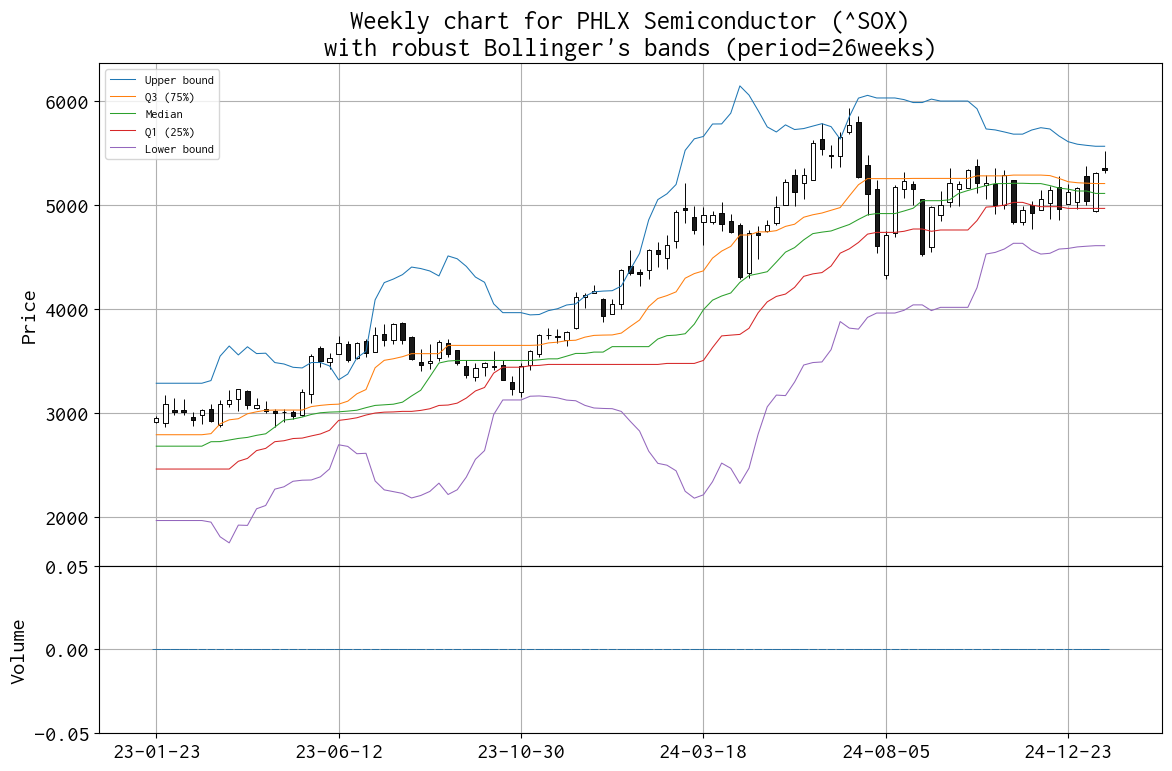

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=0.75, label='Upper bound', ax=ax[0]),
    mpf.make_addplot(mv_q3[df.index], width=0.75, label='Q3 (75%)', ax=ax[0]),
    mpf.make_addplot(mv_median[df.index], width=0.75, label='Median', ax=ax[0]),
    mpf.make_addplot(mv_q1[df.index], width=0.75, label='Q1 (25%)', ax=ax[0]),
    mpf.make_addplot(mv_lower[df.index], width=0.75, label='Lower bound', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=ax[1],
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=26weeks)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=26weeks)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_bollinger_robust_sox.png')
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-13 00:00:00-05:00,4945.970215,5319.680176,4929.930176,5309.740234,0,0.0,0.0
2025-01-20 00:00:00-05:00,5356.910156,5525.149902,5307.520020,5341.939941,0,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-01-13 00:00:00-05:00    5309.740234
2025-01-20 00:00:00-05:00    5341.939941
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-01-13 00:00:00-05:00          NaN
2025-01-20 00:00:00-05:00    32.199707
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-01-20 00:00:00-05:00   -14.970215
dtype: float64

In [9]:
df['Close'].rolling(13).mean()

Date
2023-01-23 00:00:00-05:00            NaN
2023-01-30 00:00:00-05:00            NaN
2023-02-06 00:00:00-05:00            NaN
2023-02-13 00:00:00-05:00            NaN
2023-02-20 00:00:00-05:00            NaN
                                ...     
2024-12-23 00:00:00-05:00    5097.776142
2024-12-30 00:00:00-05:00    5094.453839
2025-01-06 00:00:00-05:00    5071.494629
2025-01-13 00:00:00-05:00    5079.273099
2025-01-20 00:00:00-05:00    5089.204627
Name: Close, Length: 105, dtype: float64

In [10]:
df['Close'].rolling(26).mean()

Date
2023-01-23 00:00:00-05:00            NaN
2023-01-30 00:00:00-05:00            NaN
2023-02-06 00:00:00-05:00            NaN
2023-02-13 00:00:00-05:00            NaN
2023-02-20 00:00:00-05:00            NaN
                                ...     
2024-12-23 00:00:00-05:00    5102.838848
2024-12-30 00:00:00-05:00    5083.890381
2025-01-06 00:00:00-05:00    5055.516545
2025-01-13 00:00:00-05:00    5057.154241
2025-01-20 00:00:00-05:00    5066.339243
Name: Close, Length: 105, dtype: float64

In [11]:
df['Close'].rolling(52).mean()

Date
2023-01-23 00:00:00-05:00            NaN
2023-01-30 00:00:00-05:00            NaN
2023-02-06 00:00:00-05:00            NaN
2023-02-13 00:00:00-05:00            NaN
2023-02-20 00:00:00-05:00            NaN
                                ...     
2024-12-23 00:00:00-05:00    4946.864784
2024-12-30 00:00:00-05:00    4970.521705
2025-01-06 00:00:00-05:00    4989.464787
2025-01-13 00:00:00-05:00    5007.428063
2025-01-20 00:00:00-05:00    5026.655752
Name: Close, Length: 105, dtype: float64

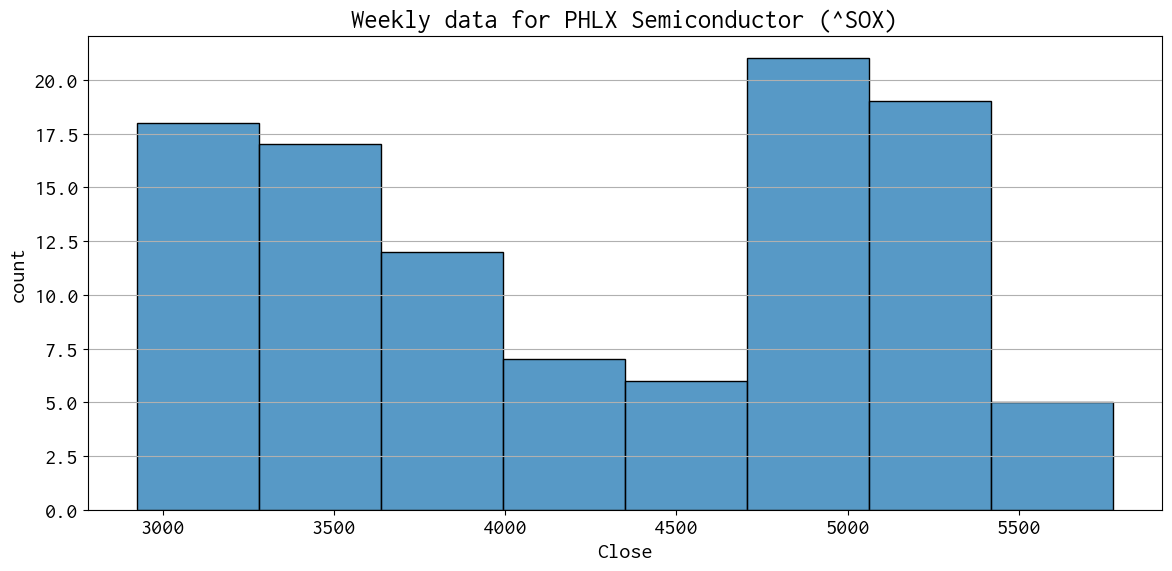

In [12]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_n225.png')
plt.show()

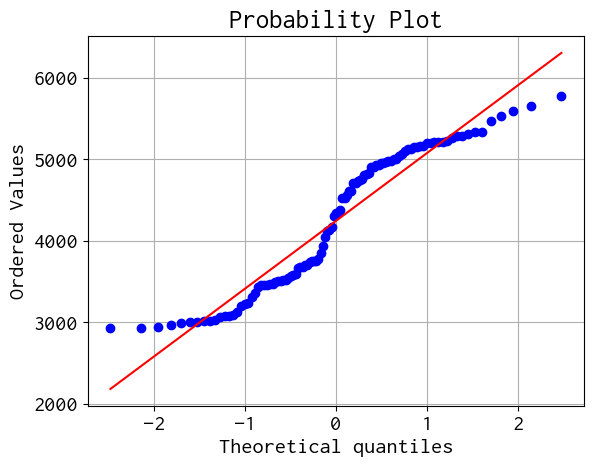

In [13]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [14]:
len(df)

105

In [15]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.914880020794059, p-value: 4.759142870020242e-06
